In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# <center>MATH40006 Python Midterm Test 2020-21</center>

<center>One Hour</center>

<center>25 February 2021</center>

Show all code, output and diagrams, unless instructed otherwise. Where you are asked to test a function, full marks are only available if you show evidence of this testing. Function code should be appropriately commented, and each function should have at least a one-line docstring.

Please submit as a Jupyter notebook.

## Question 1 (20 marks)

(a) Import the NumPy module, and use it to set up two 1D arrays called `xvals` and `yvals`, each of which should consist of 200 equally-spaced floats between $0.01$ and $2.0$.

In [41]:
xvals = np.linspace(0.01,2.0,200)
yvals = np.linspace(0.01,2.0,200)

<font color='red'>3 marks</font>

(b) Using the `meshgrid` function from NumPy, set up two 2D arrays called `x` and `y`, which should correspond respectively to the $x$- and $y$-coordinates of points on an equally-spaced $200\times 200$ lattice occupying the square $0.01\le x \le 2.0$, $0.01 \le y \le 2.0$.

In [42]:
x, y = np.meshgrid(xvals, yvals)

<font color='red'>3 marks</font>

(c) Set up a 2D array called `z`, consisting of the values, on the $200\times200$ lattice, of the function
$$x + y - \log x - \log y.$$

In [43]:
z = x + y - np.log(x) - np.log(y)

<font color='red'>2 marks</font>

(d) Set up 2D arrays called `dzdx` and `dzdy`, consisting of the values, on the $200\times200$ lattice, of the functions
$$1 - \frac{1}{x}\mbox{   and   }1- \frac{1}{y}$$
respectively (note that these correspond to the partial derivatives of $z$ with respect to $x$ and $y$).

In [39]:
dzdx, dzdy = 1 - 1/x, 1 - 1/y

<font color='red'>2 marks</font>

(e) On the same pair of axes, show a streamplot of the vector field `(dzdy, -dzdx)`, in blue, together with a contour plot of `z`, in red. In the contour plot, set the `levels` keyword argument so that the contours shown correspond to $z=2.01,\,2.02,\,2.03,\,\dots,\,3.00$. Make the scales the same on both axes.

Comment briefly on what you see.

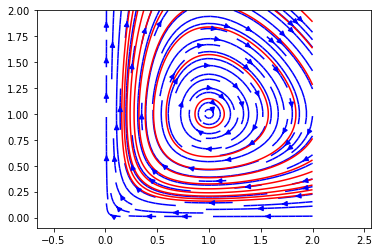

In [45]:
plt.streamplot(x, y, dzdy, -dzdx, color='blue')
plt.contour(x, y, z, levels = np.linspace(2.01,3,10), colors='red')
plt.axis('equal');

<font color='red'>10 marks<br/>
    

<i>
    (Broadly correct streamplot: 2 marks<br/>
    Correct colour: 1 mark<br/>
    Broadly correct contour plot: 2 marks<br/>
    Correct colour: 1 mark<br/>
    Correct levels setting: 2 marks<br/>
    Equal scales on the axes: 1 mark<br/>
    Sensible comment to the effect that stream lines follow contours: 1 mark.)
</i>

</font>



## Question 2 (30 marks)

The following is an iterative implementation of a function for calculating the $n$th line of Pascal's triangle, where $n$ is a non-negative integer.

In [1]:
def pascal_line1(n):
    """
    Calculates the nth line of Pascal's triangle
    """
    from numpy import array, append, flip
    
    line = array([1])
    
    # for loop
    for m in range(n):
        lengthened_line = append(line,0)
        line = lengthened_line + flip(lengthened_line)
        
    # return
    return line

(a) Test this function on a small number of varied cases, including (a) cases you can check by hand and (b) any edge cases you think necessary.

In [50]:
pascal_line1(4)

array([1, 4, 6, 4, 1])

In [51]:
pascal_line1(0)

array([1])

In [52]:
pascal_line1(1)

array([1, 1])

<font color='red'>3 marks<br/>
    

<i>
    (Tests should include at least one typical case, like 4, and at least one edge case, like 1 or 0.)
</i>

</font>

(b) Write and test a <b>recursive</b> implementation of this algorithm, `pascal_line2`. Your function must not use a loop, but must instead call itself. As with `pascal_line1`, the sole argument should be a non-negative integer, and the function should return a 1D NumPy array.

In [53]:
def pascal_line2(n):
    """
    Calculates the nth line of Pascal's triangle
    """
    from numpy import array, append, flip
    
    # base case
    if n == 0:
        return array([1])
    
    # recursion step
    else:
        line = pascal_line2(n-1)
        lengthened_line = append(line, 0)
        return lengthened_line + flip(lengthened_line)

In [54]:
pascal_line2(4)

array([1, 4, 6, 4, 1])

In [55]:
pascal_line2(1)

array([1, 1])

In [56]:
pascal_line2(0)

array([1])

<font color='red'>8 marks<br/>

<i>(Function 4, docstring/comments 1, testing 3. Tests should include at least one typical case, like 4, and at least one edge case, like 1 or 0.)
</i>

</font>

(c) Write and test a version of this function, `pascal_line3`, that uses core Python lists instead of arrays, and makes no use of NumPy functionality. Your function should be iterative: that is, it should use a loop.

In [60]:
def pascal_line3(n):
    """
    Calculates the nth line of Pascal's triangle
    """
    line = [1]
    
    # for loop
    for m in range(n):
        lengthened_line = line+[0]
        line = [lengthened_line[i]+lengthened_line[m+1-i] for i in range(m+2)]
        
    # return
    return line

In [61]:
pascal_line3(4)

[1, 4, 6, 4, 1]

In [62]:
pascal_line3(1)

[1, 1]

In [63]:
pascal_line3(0)

[1]

<font color='red'>8 marks<br/>

<i>(Function 4, docstring/comments 1, testing 3. Tests should include at least one typical case, like 4, and at least one edge case, like 1 or 0.)
</i>

</font>

(d) Write and test a recursive version of this function, `pascal_line4`, that uses core Python lists instead of arrays, and makes no use of NumPy functionality. 

In [78]:
def pascal_line4(n):
    """
    Calculates the nth line of Pascal's triangle
    """
    # base case
    if n == 0:
        return [1]
    
    # recursion step
    else:
        line = pascal_line4(n-1)
        lengthened_line = line + [0]
        return [lengthened_line[i]+lengthened_line[n-i] for i in range(n+1)]        

In [79]:
pascal_line4(4)

[1, 4, 6, 4, 1]

In [80]:
pascal_line4(1)

[1, 1]

In [81]:
pascal_line4(0)

[1]

<font color='red'>8 marks<br/>

<i>(Function 4, docstring/comments 1, testing 3. Tests should include at least one typical case, like 4, and at least one edge case, like 1 or 0.)
</i>

</font>

(e) Using the `time` function from the `time` module, or otherwise, time each of your iterative functions, `pascal_line1` and `pascal_line3`, on the task of calculating the $10 000$th (ten thousandth) line of Pascal's triangle. Comment briefly on your findings.

In [85]:
from time import time
start = time()
pascal_line1(10000)
print(time() - start)

0.11812329292297363


In [83]:
from time import time
start = time()
pascal_line3(10000)
print(time() - start)

19.58424401283264


<font color='red'>3 marks<br/>
    

<i>
    (Tests 2, sensible comment 1.)
</i>

</font>